# Proyek Submission Machine Learning Terapan: Crop Yield Prediction
- **Nama:** Moh Hasbi Rizqulloh
- **Email:** hasbirizqulloh95@gmail.com
- **ID Dicoding:** hasbirizqulloh

# **1. Import Semua Packages/Library yang Digunakan**

In [2]:
import kagglehub
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# **2. Data Loading**

### Mengunduh Dataset
Pada langkah ini, kita mengunduh dataset dari Kaggle menggunakan fungsi `dataset_download` dari `kagglehub`. Dataset yang diunduh adalah dataset yang berjudul "crop-yield-prediction-dataset" yang berisi informasi terkait dengan prediksi hasil panen. Setelah proses pengunduhan selesai, path atau lokasi dari file dataset tersebut akan dicetak, yang bisa digunakan untuk memuat dan memanipulasi data lebih lanjut.

Metode ini penting untuk mendapatkan dataset yang relevan untuk analisis dan pengembangan model prediksi hasil panen.


In [3]:
# Download latest version
path = kagglehub.dataset_download("mrigaankjaswal/crop-yield-prediction-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/crop-yield-prediction-dataset


### Menampilkan Daftar File dalam Direktori
Setelah dataset berhasil diunduh, kita menggunakan perintah `os.listdir(path)` untuk memverifikasi file apa saja yang ada di dalam direktori tempat dataset disimpan. Fungsi ini akan mengembalikan sebuah daftar yang berisi nama file dan folder yang ada dalam path tersebut. Hal ini penting untuk memastikan bahwa file dataset yang diunduh ada di lokasi yang tepat dan siap digunakan untuk proses selanjutnya, seperti pemuatan data dan eksplorasi.


In [4]:
os.listdir(path)

['yield_df.csv']

### Memuat Dataset ke dalam DataFrame
Pada langkah ini, kita memuat file CSV bernama `yield_df.csv` yang terletak di direktori yang telah ditentukan sebelumnya (path) menggunakan fungsi `pd.read_csv()`. Fungsi ini akan membaca konten file CSV dan mengonversinya menjadi objek DataFrame dari `pandas`, yang memungkinkan kita untuk melakukan analisis dan manipulasi data lebih lanjut dengan mudah.

Dataset ini berisi data terkait prediksi hasil panen, dan kita akan menggunakan DataFrame `df` untuk melakukan eksplorasi data lebih lanjut, termasuk pembersihan data, analisis, atau pengembangan model prediksi.


In [5]:
df = pd.read_csv(os.path.join(path, "yield_df.csv"))
df

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...,...
28237,28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


# **3. Eksploratory Data Analysis**

## Mengecek Struktur Data

### Menampilkan Informasi DataFrame
Pada langkah ini, kita menggunakan metode `df.info()` untuk mendapatkan informasi umum tentang DataFrame yang berisi dataset yang telah dimuat. Metode ini memberikan informasi penting, seperti:
- Jumlah total baris dan kolom dalam dataset.
- Tipe data setiap kolom (misalnya `int64`, `float64`, `object`).
- Jumlah nilai non-null (tidak kosong) untuk setiap kolom, yang membantu dalam mendeteksi apakah ada missing values atau tidak.

Informasi ini sangat penting untuk tahap eksplorasi data, karena dapat memberi petunjuk awal mengenai kualitas data dan apakah ada kolom yang memerlukan penanganan lebih lanjut (seperti pengisian nilai kosong).


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


### Menampilkan Ringkasan Statistik Deskriptif
Pada langkah ini, kita menggunakan metode `df.describe()` untuk menghasilkan ringkasan statistik deskriptif dari data numerik dalam dataset. Fungsi ini memberikan informasi yang sangat berguna untuk menganalisis distribusi data, seperti:
- **count**: Jumlah nilai non-null (tidak kosong) pada setiap kolom.
- **mean**: Rata-rata nilai pada setiap kolom.
- **std**: Standar deviasi, yang mengukur variasi data.
- **min**: Nilai minimum dalam setiap kolom.
- **25%**: Kuartil pertama (25% data berada di bawah nilai ini).
- **50% (median)**: Kuartil kedua (50% data berada di


In [7]:
df.describe()

,Unnamed: 0,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,14120.500000,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,8152.907488,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,0.000000,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,7060.250000,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,14120.500000,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,21180.750000,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,28241.000000,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


### Insight
- Terdapat indikasi ada kolom yang tidak relevan dengan analisis nanti. akan dicek pada penanganan missing values.
- Dataset menunjukkan adanya nilai ekstrim (outliers) pada kolom seperti hasil panen dan penggunaan pestisida. Hal ini perlu diperiksa lebih lanjut, karena outliers dapat memengaruhi hasil analisis atau pembuatan model prediksi jika tidak ditangani dengan tepat.
- `hg/ha_yield` Nilai maksimum jauh lebih besar dari Q3 dan median → kemungkinan ada outlier di bagian atas.
- `pesticides_tonnes` Max sangat jauh dari Q3 dan mean ada indikasi kuat outlier atau bisa jadi salah input atau terkendala dengan tahun dan area negara yang menerapkan kebijakan ketat tentang pestisida.
- `avg_temp` Distribusi terlihat normal, tapi nilai minimum 1.3 °C cukup rendah untuk data rata-rata tahunan (kecuali ini dari negara seperti Greenland atau pegunungan tinggi). Perlu dicek datanya berasal dari mana (Area).


## Mengecek Missing Values

### Menghitung Missing Values
Pada langkah ini, kita menggunakan metode `df.isnull().sum()` untuk menghitung jumlah nilai yang hilang (missing values) di setiap kolom dalam dataset. Fungsi `isnull()` memeriksa apakah setiap nilai di kolom tersebut adalah `null` atau kosong, dan `.sum()` menghitung total jumlah nilai kosong pada setiap kolom.

Hasil dari perintah ini akan memberikan gambaran tentang kolom mana yang memiliki missing values dan seberapa besar jumlahnya. Ini penting karena missing values dapat mempengaruhi analisis dan model yang akan dibangun, dan perlu ditangani sebelum melanjutkan ke tahap berikutnya.


In [11]:
df.isnull().sum()

,0
Unnamed: 0,0
Area,0
Item,0
Year,0
hg/ha_yield,0
average_rain_fall_mm_per_year,0
pesticides_tonnes,0
avg_temp,0


### Mengecek Kolom Tidak Berguna
Pada langkah ini, kita menemukan adanya kolom bernama `Unnamed: 0` yang berisi angka urut (index) yang tidak memiliki nilai informasi yang relevan untuk analisis. Kolom ini biasanya muncul jika dataset disimpan dengan indeks baris sebagai kolom dalam file CSV.

Karena kolom ini tidak membawa informasi yang berguna, kita bisa menghapusnya untuk menjaga kebersihan data dan menghindari kebingungan saat analisis. Penghapusan kolom seperti ini adalah langkah umum dalam pembersihan data.


In [12]:
df['Unnamed: 0']

,Unnamed: 0
0,0
1,1
2,2
3,3
4,4
...,...
28237,28237
28238,28238
28239,28239
28240,28240


### Insight
- Tidak ada nilai kosong (NaN/null) di semua kolom.
- Terdapat kolom bernama Unnamed yang redundant, kolom ini hanya duplikasi dari index baris. Sudah seharusnya dihapus, karena tidak menambah informasi apa pun.


## Mengecek Outlier

### Menyaring Data dengan Penggunaan Pestisida yang Sangat Rendah
Pada langkah ini, kita memfilter dataset untuk menampilkan hanya baris-baris yang memiliki nilai **0.04 ton** pada kolom `pesticides_tonnes`. Nilai ini sangat kecil dan bisa menunjukkan:
- Daerah atau waktu yang memiliki penggunaan pestisida yang sangat rendah atau bahkan tidak signifikan.
- Potensi data yang mungkin mencakup kesalahan input atau kondisi ekstrem.
  
Langkah ini penting untuk memeriksa apakah ada kasus yang perlu diinvestigasi lebih lanjut, terutama untuk menangani nilai ekstrem atau outliers dalam dataset.


In [13]:
df[df['pesticides_tonnes'] == 0.04]

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
6130,6130,Central African Republic,Cassava,1990,28432,1342.0,0.04,25.42
6131,6131,Central African Republic,Maize,1990,7324,1342.0,0.04,25.42
6132,6132,Central African Republic,Plantains and others,1990,26154,1342.0,0.04,25.42
6133,6133,Central African Republic,Potatoes,1990,24509,1342.0,0.04,25.42
6134,6134,Central African Republic,"Rice, paddy",1990,16729,1342.0,0.04,25.42
6135,6135,Central African Republic,Sorghum,1990,7772,1342.0,0.04,25.42
6136,6136,Central African Republic,Yams,1990,65714,1342.0,0.04,25.42
6137,6137,Central African Republic,Cassava,1991,33604,1342.0,0.04,25.45
6138,6138,Central African Republic,Maize,1991,8149,1342.0,0.04,25.45
6139,6139,Central African Republic,Plantains and others,1991,26576,1342.0,0.04,25.45


### Menghitung Jumlah Baris dengan Penggunaan Pestisida Sangat Rendah
Pada tahap ini, kita menghitung jumlah observasi dalam dataset `df_clean` di mana kolom `pesticides_tonnes` bernilai **0.04 ton**. Nilai ini dianggap sangat rendah dan dapat mengindikasikan:
- Penggunaan pestisida yang sangat minim atau hampir tidak ada (mungkin praktik pertanian organik).
- Potensi outlier atau anomali dalam data.

Dengan menjumlahkan kondisi `df_clean.pesticides_tonnes == 0.04`, kita bisa mengetahui **berapa banyak kasus seperti ini terjadi** dalam dataset. Ini membantu dalam memahami distribusi data dan memutuskan apakah nilai-nilai tersebut perlu ditangani khusus.



In [14]:
pestisida = (df.pesticides_tonnes == 0.04).sum()
print(pestisida)

21


### Menyaring Data Berdasarkan Suhu Rata-rata Terendah
Pada tahap ini, kita memfilter data untuk menemukan baris dengan nilai suhu rata-rata (`avg_temp`) paling rendah, yaitu **1.3°C**. Nilai ini merupakan nilai **minimum** yang sebelumnya terlihat saat menjalankan `df.describe()`, sehingga penting untuk:
- Memeriksa apakah nilai tersebut **masuk akal secara kontekstual** (misalnya, mungkin berasal dari negara dengan musim dingin ekstrem).
- Atau justru nilai ini merupakan **anomali atau kesalahan data (outlier)** yang perlu ditangani, terutama jika tidak sesuai dengan wilayah pertanian umumnya.

Langkah ini membantu kita memahami kualitas dan validitas data, terutama ketika nilai minimum tampak tidak wajar.


In [15]:
df.loc[df['avg_temp'] == 1.3]

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
21694,21694,Norway,Potatoes,2010,251662,1414.0,698.98,1.3
21695,21695,Norway,Wheat,2010,45975,1414.0,698.98,1.3


### Visualisasi Distribusi Penggunaan Pestisida
Pada tahap ini, kita menggunakan boxplot untuk melihat distribusi nilai pada kolom `pesticides_tonnes` `hg/ha_yield`, `avg_temp`. Boxplot berguna untuk:
- Melihat **nilai tengah (median)**, **kuartil (Q1 dan Q3)**, serta **sebaran data**.
- Mengidentifikasi **outlier** atau nilai-nilai ekstrem, yaitu titik-titik yang berada jauh di luar rentang normal data (biasanya lebih dari 1.5 IQR dari Q1 atau Q3).

Dengan visualisasi ini, kita bisa memahami apakah data penggunaan pestisida memiliki **penyebaran yang normal atau miring**, serta apakah terdapat **banyak nilai ekstrem (outliers)** yang bisa memengaruhi analisis atau modeling.


<Axes: xlabel='pesticides_tonnes'>

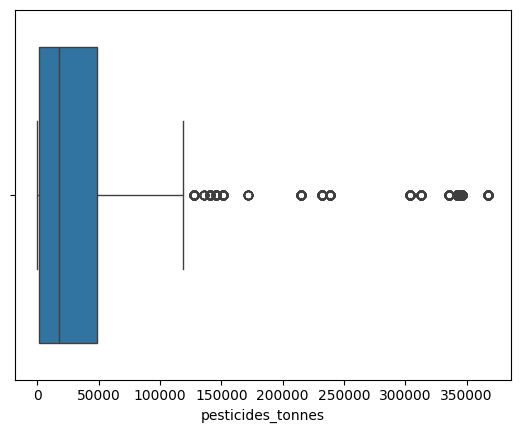

In [16]:
sns.boxplot(x=df['pesticides_tonnes'])

<Axes: xlabel='hg/ha_yield'>

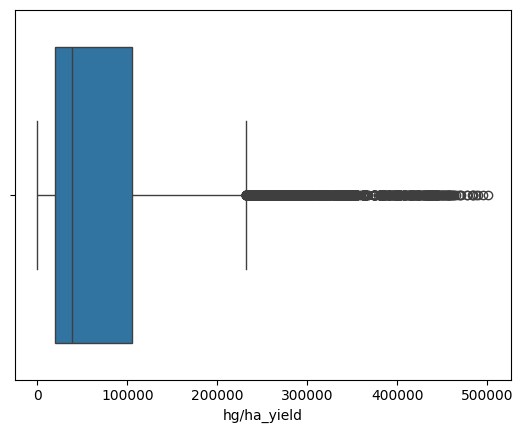

In [17]:
sns.boxplot(x=df['hg/ha_yield'])

<Axes: xlabel='avg_temp'>

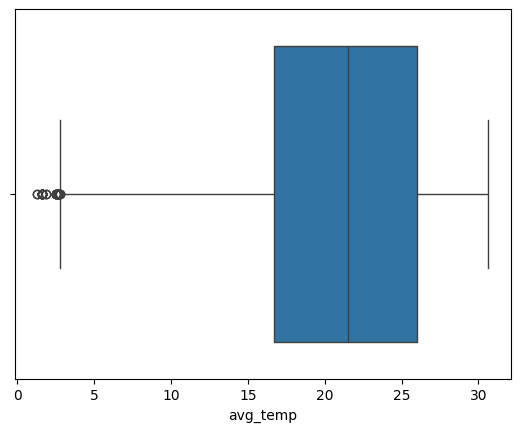

In [18]:
sns.boxplot(x=df['avg_temp'])

### Insight
- Nilai minimum `pesticides_tonnes` adalah 0.04, sangat kecil dibandingkan Q1 (1702) hingga max (367,778). ini akan ditangani di outlier karena setelah di cek bukan karena kesalahan input yang menimbulkan missing values melainkan karena faktor negara dan tahun-tahun awal (1990-an) — wajar untuk masa itu (belum banyak pakai pestisida).
- Distribusi suhu rata-rata menunjukkan keragaman iklim di dataset, dengan sebagian besar negara memiliki suhu 16–26°C, namun terdapat outlier dengan suhu ekstrem rendah (~1.3°C) seperti di Norwegia. Ini mengindikasikan bahwa data mencakup wilayah beriklim tropis hingga sangat dingin. `avg_temp` minimum untuk suhu rata-rata tahunan 1.3°C di Norway masih masuk akal karena negara Skandinavia yang dingin. ini akan dicek lebih lanjut pada penanganan outlier.
- Hasil panen (hg/ha_yield) sangat bervariasi antar negara dan komoditas, dengan mayoritas hasil di bawah 200.000 hg/ha, namun banyak ditemukan outlier dengan produktivitas sangat tinggi, menandakan adanya ketimpangan hasil panen yang signifikan.


## Univariate Analysis

### Categorical Features

##### Menentukan Fitur Kategorikal
Langkah ini bertujuan untuk mengidentifikasi kolom-kolom dalam dataset `df_clean_ou` yang bertipe data **objek** (biasanya string), yang berarti mereka berisi data **kategorikal** (seperti nama negara, jenis tanaman, dsb).

Metode `select_dtypes(include='object')` akan memilih semua kolom bertipe objek, lalu `.columns.tolist()` akan mengubahnya menjadi daftar nama kolom.
Hasil ini disimpan dalam variabel `categorical_features`, yang kemudian bisa digunakan untuk keperluan seperti:
- Encoding (misalnya: one-hot encoding)
- Visualisasi distribusi kategori
- Analisis data kategorikal secara spesifik


In [19]:
categorical_features = df.select_dtypes(include='object').columns.tolist()

In [20]:
categorical_features

['Area', 'Item']

##### Visualisasi Jumlah dan Persentase Kategori pada Fitur
Langkah ini digunakan untuk:
1. Menghitung jumlah kemunculan (count) dari setiap kategori pada fitur pertama (contoh: 'country').
2. Menghitung persentase distribusinya terhadap total data.
3. Menampilkan hasilnya dalam bentuk DataFrame `count_percent` yang menunjukkan count dan persentase dari setiap kategori.
4. Membuat visualisasi **horizontal bar chart** dari count tiap kategori.

Visualisasi ini membantu untuk:
- Mengetahui **kategori mana yang dominan** dalam data.
- Mengenali **ketidakseimbangan kelas** yang mungkin penting dalam analisis


            count  percent
Area                      
India        4048     14.3
Brazil       2277      8.1
Mexico       1472      5.2
Pakistan     1449      5.1
Australia     966      3.4
...           ...      ...
Latvia         42      0.1
Belgium        39      0.1
Bahrain        29      0.1
Sudan          28      0.1
Montenegro     24      0.1

[101 rows x 2 columns]


<Axes: title={'center': 'Count Distribution for Area'}, ylabel='Area'>

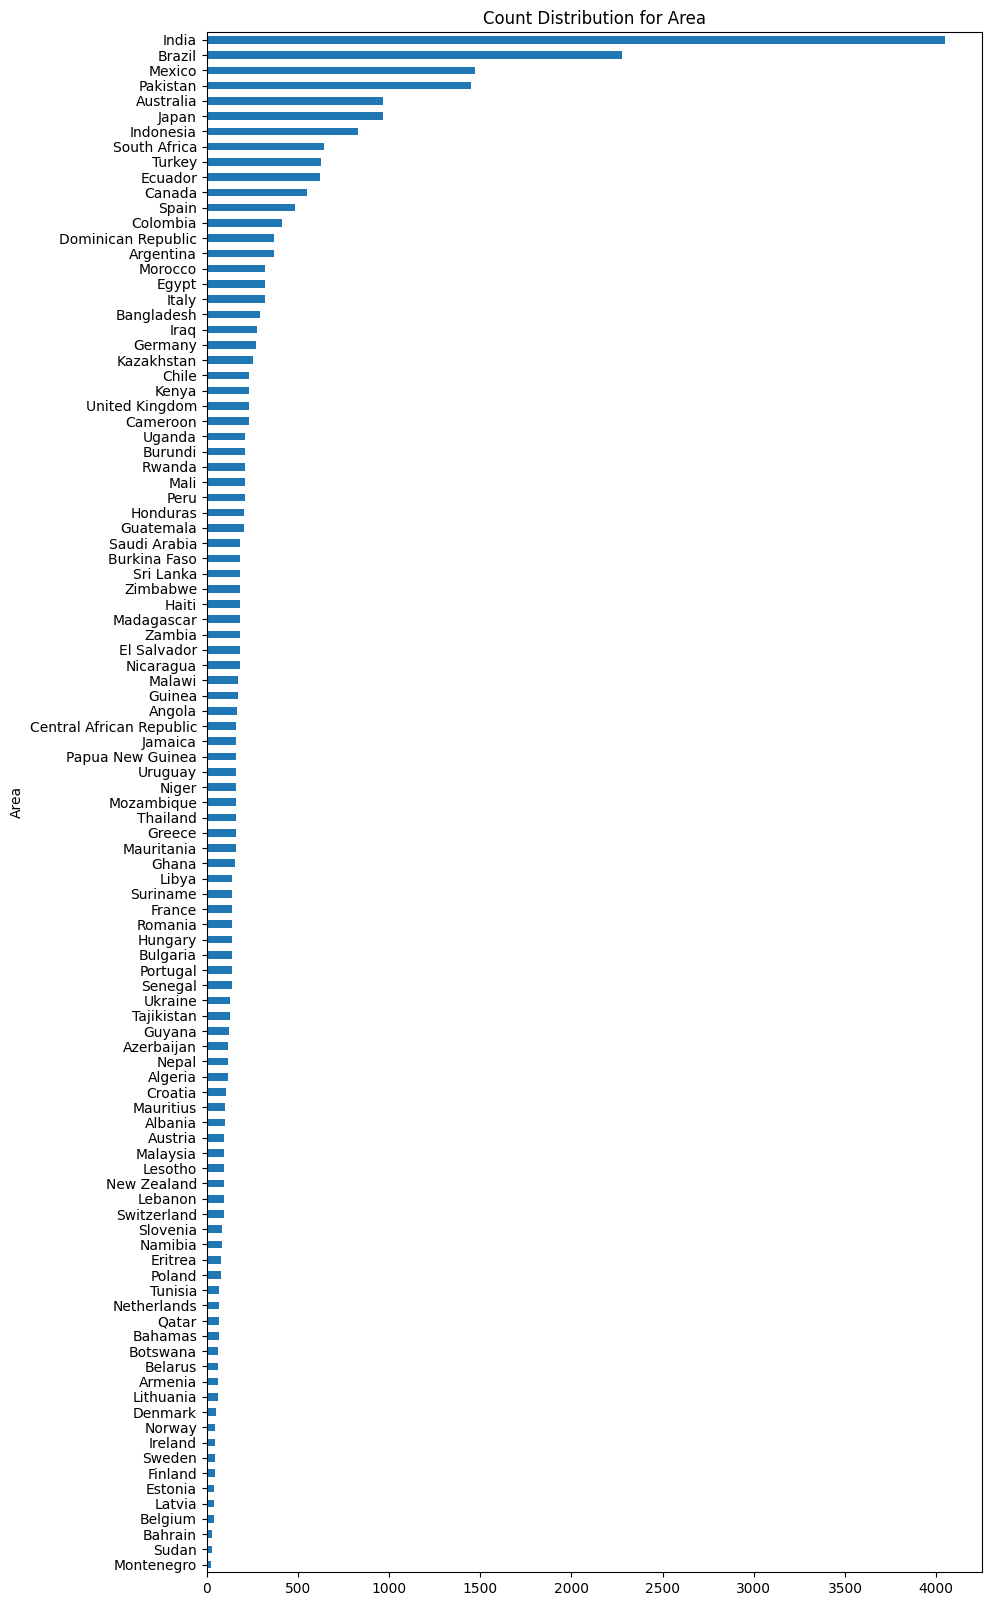

In [21]:
feature = categorical_features[0]
count = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize=True)
count_percent = pd.DataFrame({'count': count, 'percent': percent.round(1)})
print(count_percent)
count.sort_values().plot(kind='barh', figsize=(10, 20), title=f'Count Distribution for {feature}')

                      count  percent
Item                                
Potatoes               4276     15.1
Maize                  4121     14.6
Wheat                  3857     13.7
Rice, paddy            3388     12.0
Soybeans               3223     11.4
Sorghum                3039     10.8
Sweet potatoes         2890     10.2
Cassava                2045      7.2
Yams                    847      3.0
Plantains and others    556      2.0


<Axes: title={'center': 'Count Distribution for Item'}, xlabel='Item'>

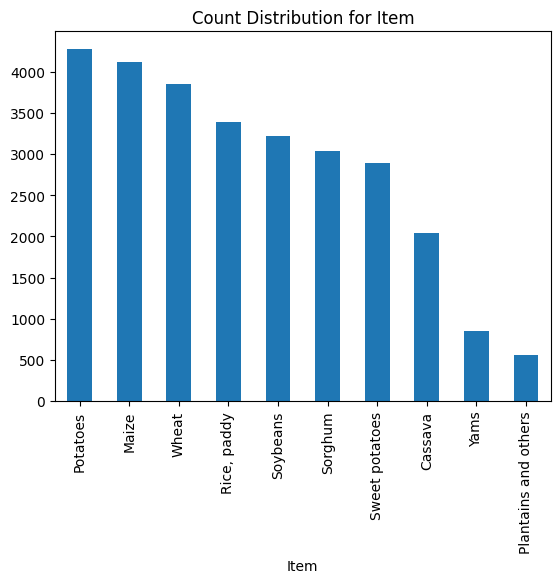

In [22]:
feature = categorical_features[1]
count = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize=True)
count_percent = pd.DataFrame({'count': count, 'percent': percent.round(1)})
print(count_percent)
count.plot(kind='bar', title=f'Count Distribution for {feature}')

### Numerical Features

##### Visualisasi Distribusi Fitur Numerik dengan Histogram
Langkah ini digunakan untuk menampilkan histogram dari setiap kolom numerik dalam dataset `df_clean_ou`. Histogram ini memberikan gambaran visual tentang:
- **Distribusi data** (normal, skewed, uniform, dll.)
- **Penyebaran nilai** dari masing-masing fitur
- Kemungkinan adanya **outliers** atau **nilai ekstrim**
- Jumlah data dalam berbagai rentang nilai

Parameter:
- `bins=60` membagi rentang data menjadi 60 interval.
- `figsize=(20, 15)` mengatur ukuran plot agar seluruh histogram dapat ditampilkan dengan jelas.


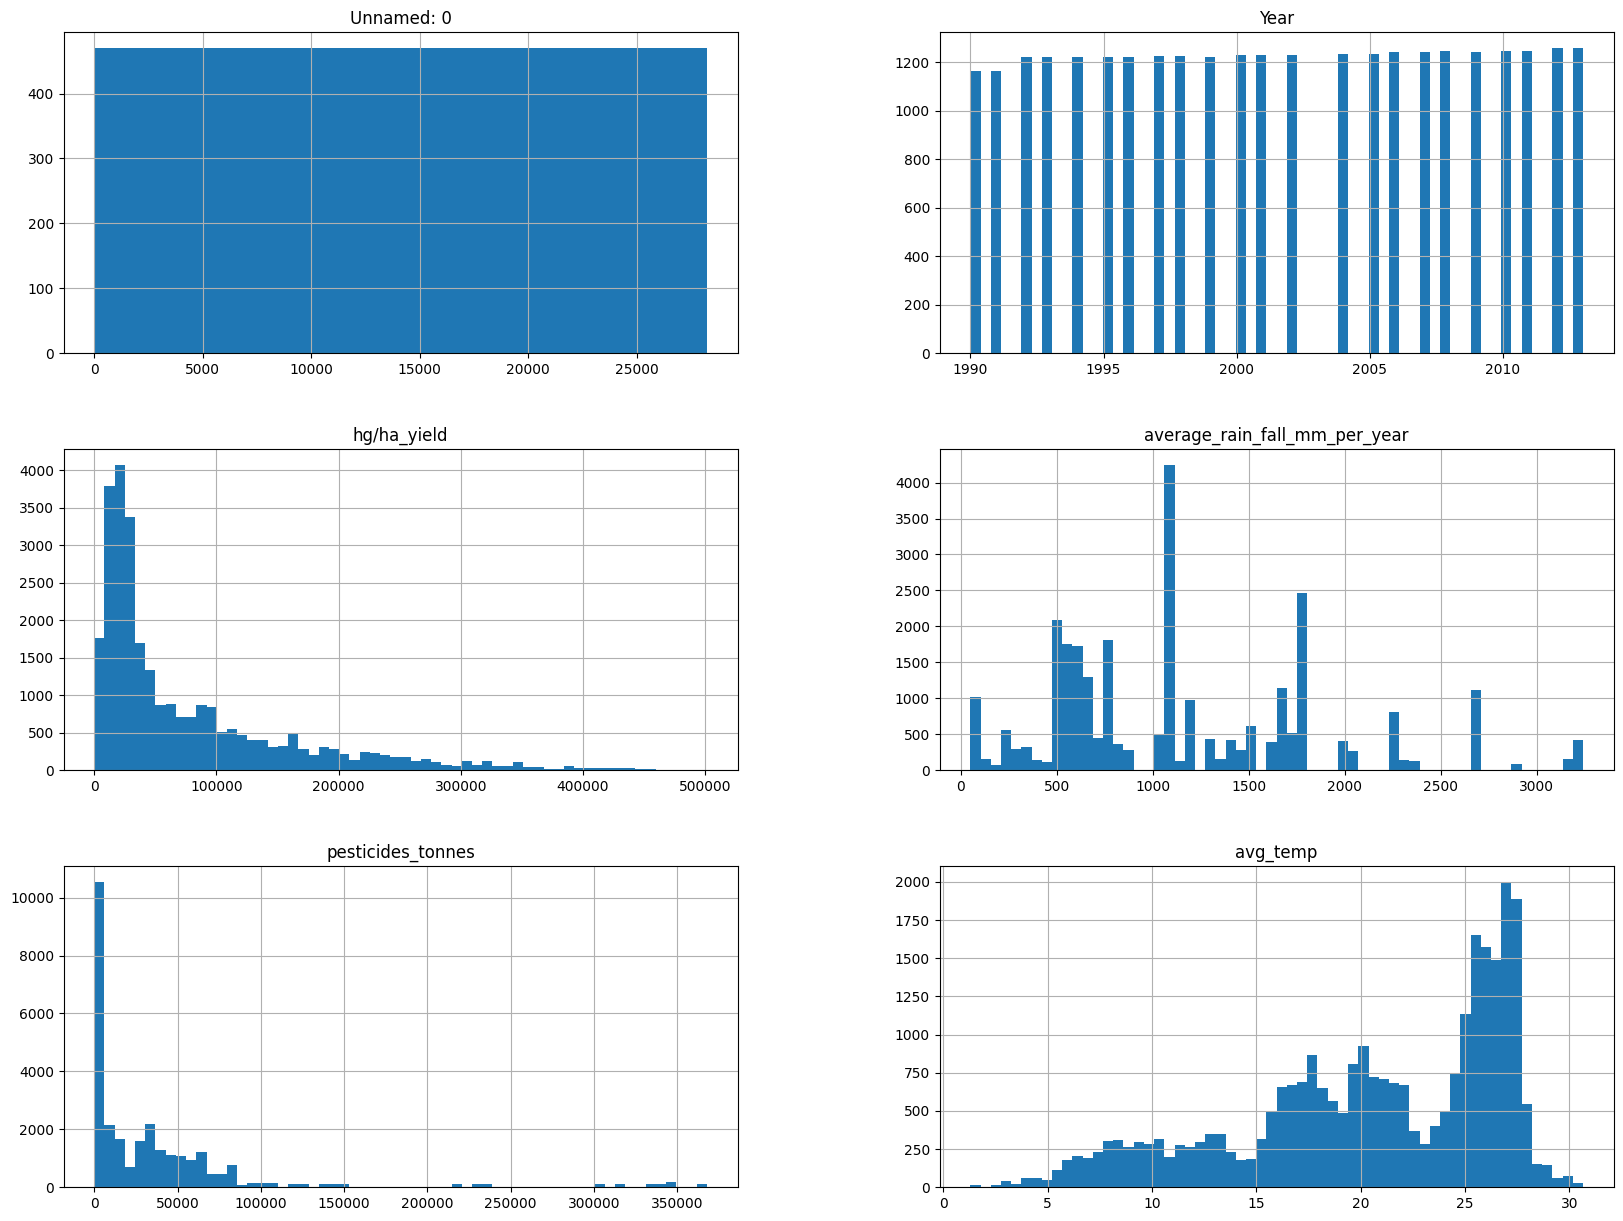

In [23]:
df.hist(bins=60, figsize=(20, 15))
plt.show()

### Insight

1. **Distribusi Negara (Area):**  
   Mayoritas data berasal dari India (14.6%), diikuti Pakistan dan Mexico, sementara negara seperti Norwegia, Swedia, dan Belgia memiliki representasi data yang sangat kecil.

2. **Distribusi Komoditas (Item):**  
   Jagung (`Maize`), gandum (`Wheat`), dan padi (`Rice, paddy`) mendominasi dataset, sedangkan komoditas seperti `Plantains`, `Yams`, dan `Cassava` memiliki proporsi data yang jauh lebih kecil.

3. **Distribusi Tahun (Year):**  
   Data tersebar merata dari tahun 1990 hingga 2013 tanpa ada gap signifikan.

4. **Distribusi Hasil dan Faktor Agrikultur:**  
   - `hg/ha_yield` dan `pesticides_tonnes` menunjukkan distribusi miring ke kanan, menandakan banyak data di rentang rendah serta adanya outlier.
   - `average_rain_fall_mm_per_year` memperlihatkan konsentrasi pada level curah hujan tertentu.

5. **Distribusi Suhu Rata-rata (avg_temp):**  
   Distribusi suhu membentuk pola bimodal, mengindikasikan adanya dua kelompok iklim utama di negara-negara dalam dataset.

## Multivariate Analysis

Analisis Visual Fitur Kategorikal terhadap Target (hg/ha_yield)

<ipython-input-25-f76cb13e3df1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=feature, y='hg/ha_yield', data=df, kind='bar', height=4, aspect=3, palette='Set3')


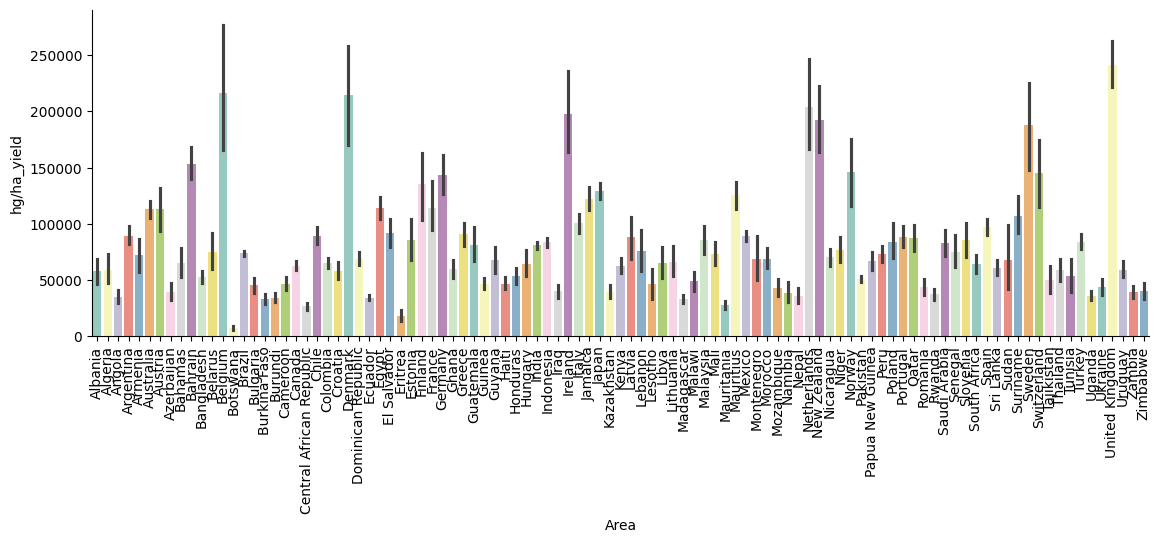

<ipython-input-25-f76cb13e3df1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=feature, y='hg/ha_yield', data=df, kind='bar', height=4, aspect=3, palette='Set3')


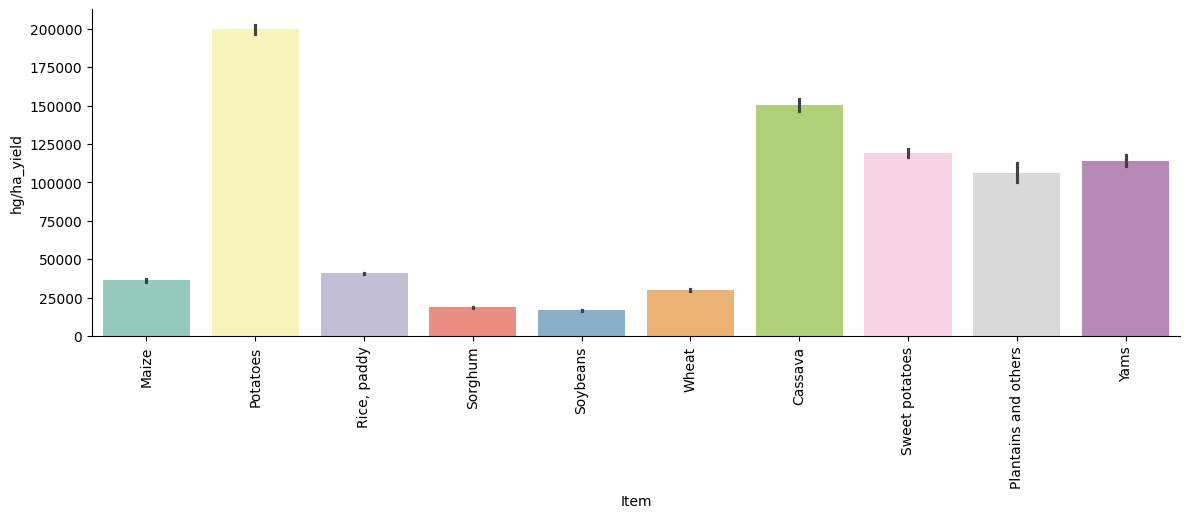

In [25]:
cat_feature = df.select_dtypes(include='object').columns.tolist()
for feature in cat_feature:
    sns.catplot(x=feature, y='hg/ha_yield', data=df, kind='bar', height=4, aspect=3, palette='Set3')
    plt.xticks(rotation=90)
    plt.show()

Visualisasi Hubungan Antar Variabel dengan Pairplot

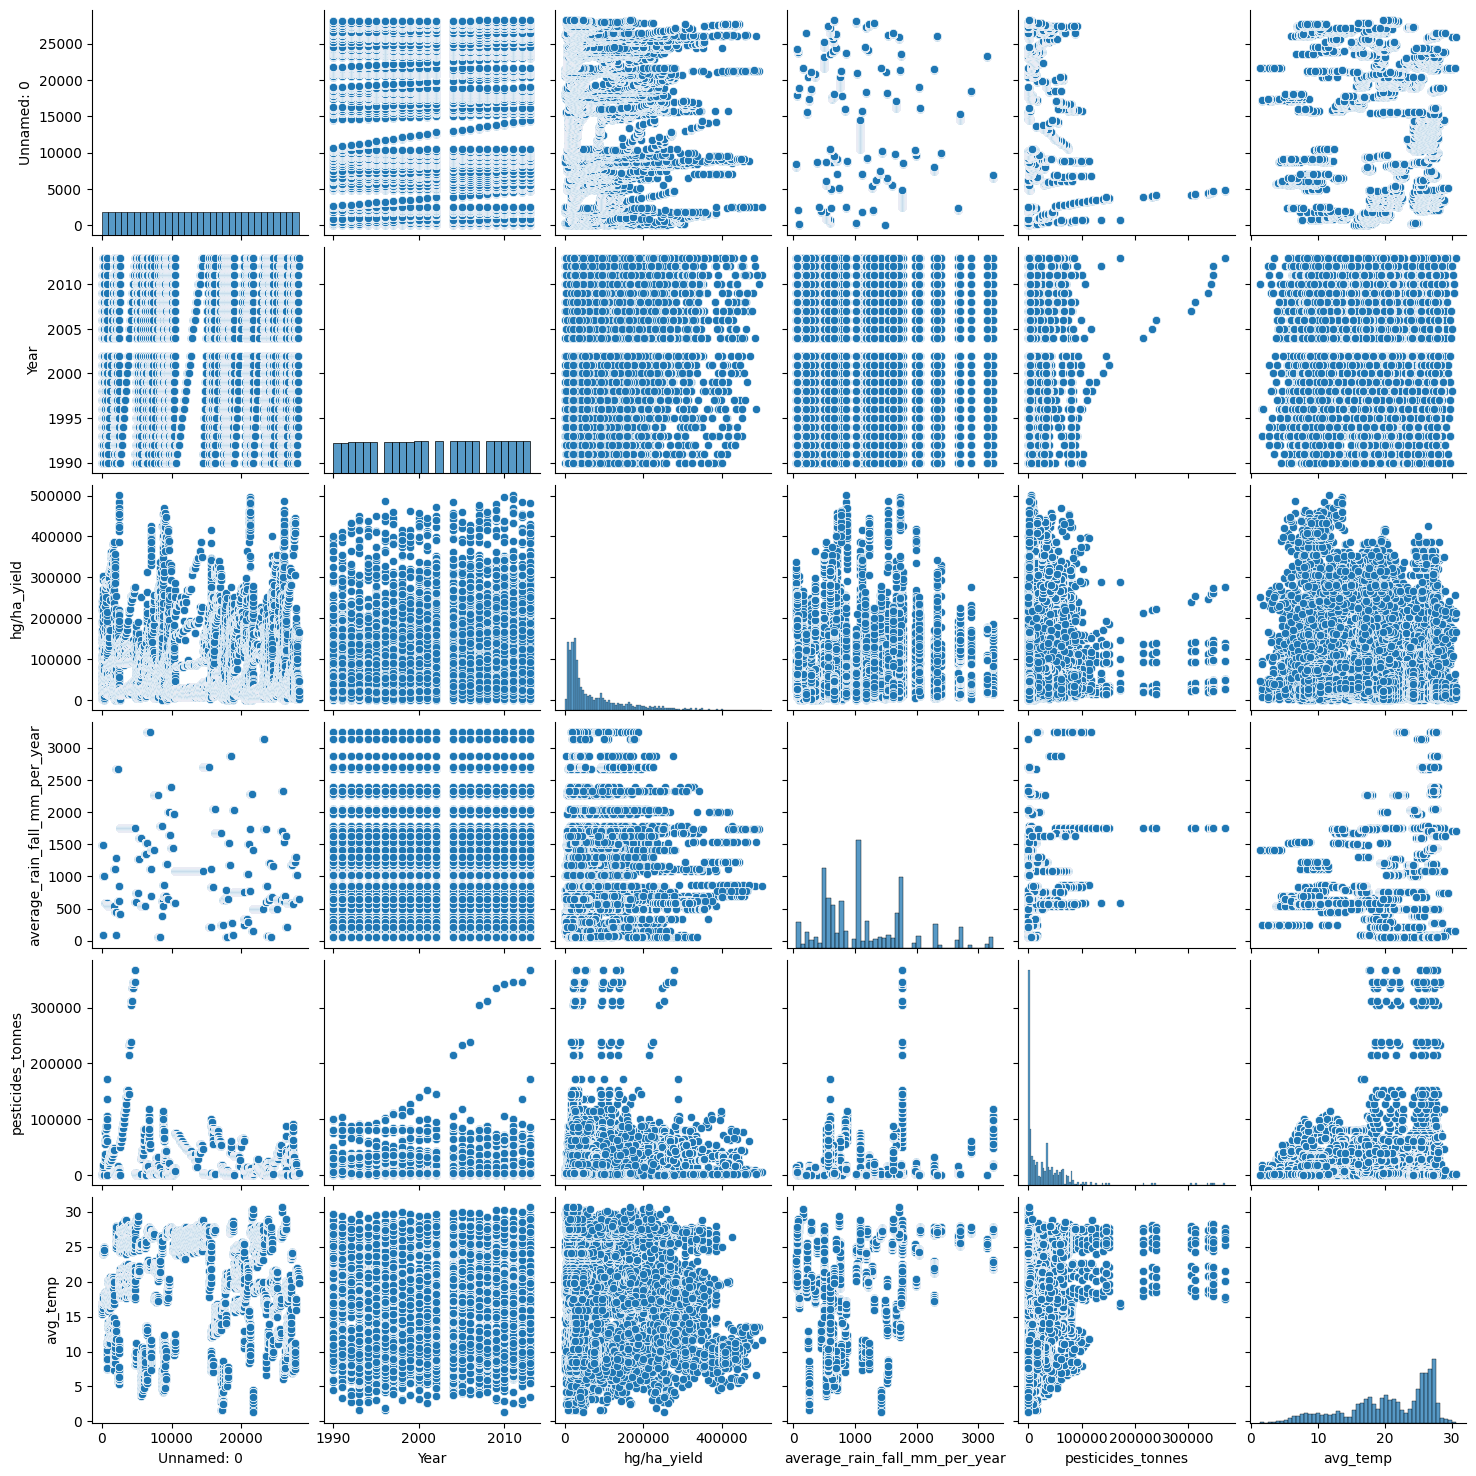

In [27]:
sns.pairplot(df)
plt.show()

Visualisasi Korelasi Fitur Numerik dengan Heatmap

Text(0.5, 1.0, 'Correlation Matrix for Numerical Features')

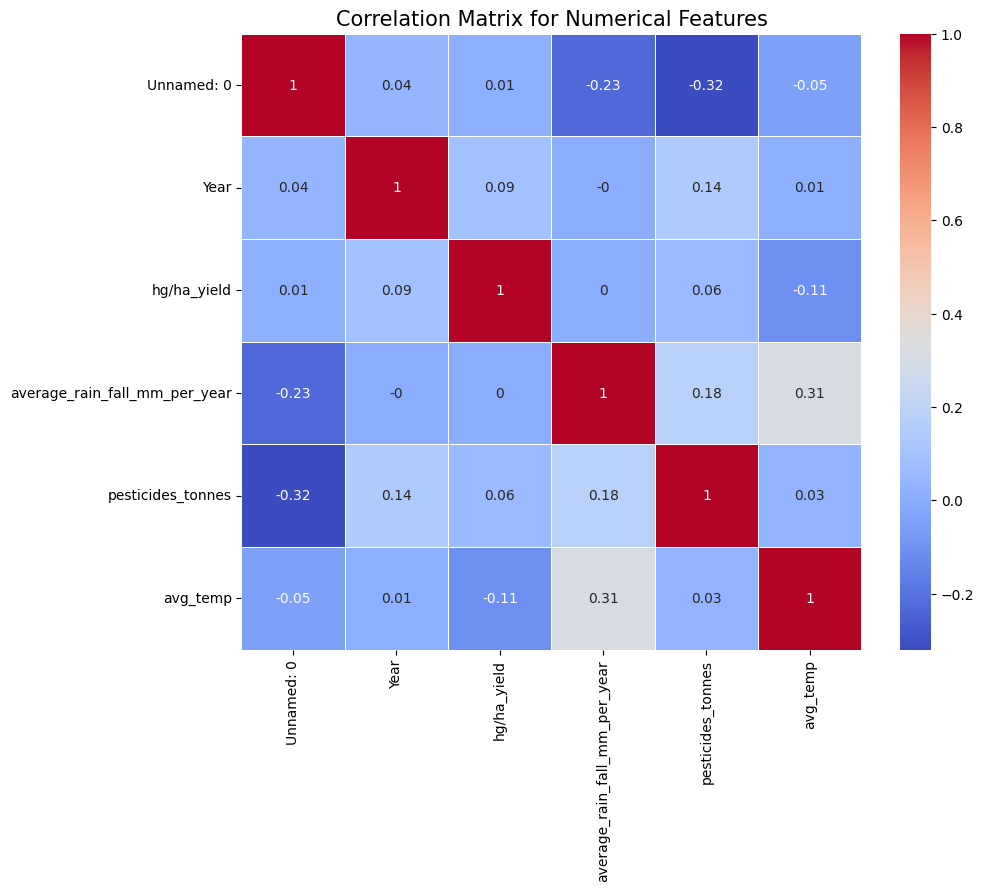

In [26]:
numerical_features = df.select_dtypes(include='number').columns.tolist()
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_features].corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title('Correlation Matrix for Numerical Features', size=15)

In [28]:
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


### Insight

1. **Korelasi Antar Fitur Numerik:**  
   Korelasi antar fitur numerik umumnya lemah; korelasi tertinggi hanya 0.32 antara `avg_temp` dan `average_rain_fall_mm_per_year`.

2. **Hubungan Target dengan Fitur Lain:**  
   `hg/ha_yield` memiliki korelasi sangat rendah terhadap semua fitur numerik, menunjukkan hubungan non-linear.

3. **Pengaruh Area terhadap Yield:**  
   Negara seperti India, Pakistan, dan Indonesia memiliki jumlah data besar, namun rata-rata hasil panen berbeda-beda.

4. **Pengaruh Item terhadap Yield:**  
   Komoditas seperti Maize, Wheat, dan Rice mendominasi data dengan variasi hasil panen yang terlihat jelas.


# **4. Data Preparation**

## Menangani Missing Values dan Outlier

### Menghapus Kolom yang Tidak Relevan
Pada tahap ini, kolom `Unnamed: 0` dihapus karena tidak membawa informasi penting untuk analisis. Kolom tersebut biasanya merupakan indeks yang dimasukkan sebagai kolom saat dataset diekspor.
- Setelah dihapus, dataset menjadi lebih bersih dan hanya berisi kolom-kolom yang relevan untuk analisis lebih lanjut.
- Dataset yang telah dibersihkan disimpan dalam DataFrame baru `df_clean`, sehingga DataFrame asli (`df`) tetap utuh.


In [29]:
df_clean = df.drop(columns=['Unnamed: 0'])
df_clean

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


### Mengidentifikasi dan Menghapus Outliers
Langkah ini mengidentifikasi dan menghapus **outliers** dari dataset berdasarkan **Interquartile Range (IQR)**, yang adalah metode yang umum digunakan untuk mendeteksi data yang ekstrem.


In [30]:
outlier_cols = df_clean[['pesticides_tonnes', 'avg_temp', 'hg/ha_yield']]
Q1 = outlier_cols.quantile(0.25)
Q3 = outlier_cols.quantile(0.75)
IQR = Q3 - Q1

df_clean_ou = df_clean[~((outlier_cols < (Q1 - 1.5 * IQR)) |(outlier_cols > (Q3 + 1.5 * IQR))).any(axis=1)]

### Mengevaluasi Dataset Setelah Penghapusan Outlier

Setelah menghapus outlier, kita melakukan beberapa pemeriksaan untuk memastikan data bersih dan siap untuk analisis lebih lanjut:

1. **`df_clean_ou.shape`**: Menampilkan dimensi dataset setelah penghapusan outlier (jumlah baris dan kolom).
2. **`df_clean_ou.info()`**: Memberikan informasi mengenai tipe data dan jumlah nilai non-null di setiap kolom.
3. **`df_clean_ou.describe()`**: Menyajikan statistik deskriptif untuk kolom numerik, seperti rata-rata, standar deviasi, nilai minimum, dan kuartil.

Langkah ini memastikan bahwa dataset sudah bersih dari outlier dan tidak memiliki missing values, serta memberikan gambaran distribusi data.

In [31]:
df_clean_ou.shape

(24815, 7)

In [32]:
df_clean_ou.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24815 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           24815 non-null  object 
 1   Item                           24815 non-null  object 
 2   Year                           24815 non-null  int64  
 3   hg/ha_yield                    24815 non-null  int64  
 4   average_rain_fall_mm_per_year  24815 non-null  float64
 5   pesticides_tonnes              24815 non-null  float64
 6   avg_temp                       24815 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [33]:
df_clean_ou.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,24815.000000,24815.000000,24815.000000,24815.000000,24815.000000
mean,2001.133186,58591.327745,1131.585775,24710.180347,20.681257
std,7.085674,55817.845694,727.463955,27315.148046,6.312491
min,1990.000000,50.000000,51.000000,0.040000,2.780000
25%,1995.000000,18193.000000,591.000000,1597.000000,16.830000
50%,2000.000000,33427.000000,1083.000000,13435.430000,21.860000
75%,2008.000000,86025.000000,1604.000000,41275.600000,26.090000
max,2013.000000,231535.000000,3240.000000,118930.560000,30.650000


### Insight
- Kolom unnamed telah di drop
- **Outlier dalam kolom `pesticides_tonnes`, `avg_temp`, dan `hg/ha_yield`** telah dihapus.
- Dataset yang bersih dari outlier disimpan dalam `df_clean_ou`, yang siap untuk analisis atau modeling lebih lanjut.


## Encoding fitur kategori

### OneHot Encoding
Pada langkah ini, kita melakukan **one-hot encoding** untuk kolom-kolom kategorikal dalam dataset `df_clean_ou`:

1. **Identifikasi Kolom Kategorikal**:
   - Menggunakan `select_dtypes(include='object')`, kita mengidentifikasi kolom-kolom dengan tipe data kategorikal (`object`).

2. **One-Hot Encoding**:
   - Menggunakan `pd.get_dummies()`, kita mengubah kolom-kolom kategorikal tersebut menjadi representasi numerik dengan membuat kolom baru untuk setiap kategori yang ada.
   - Setiap kategori diubah menjadi kolom biner (0 atau 1), yang menunjukkan apakah suatu baris memiliki kategori tersebut.

In [34]:
cat_columns = df_clean_ou.select_dtypes(include='object').columns.tolist()

In [35]:
df_onehot_encoded = pd.get_dummies(df, columns=cat_columns)

In [36]:
df_onehot_encoded

,Unnamed: 0,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area_Albania,Area_Algeria,Area_Angola,Area_Argentina,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,0,1990,36613,1485.0,121.00,16.37,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,1,1990,66667,1485.0,121.00,16.37,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,2,1990,23333,1485.0,121.00,16.37,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,3,1990,12500,1485.0,121.00,16.37,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,4,1990,7000,1485.0,121.00,16.37,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28237,28237,2013,22581,657.0,2550.07,19.76,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
28238,28238,2013,3066,657.0,2550.07,19.76,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
28239,28239,2013,13142,657.0,2550.07,19.76,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
28240,28240,2013,22222,657.0,2550.07,19.76,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


### Insight
- Hasilnya adalah DataFrame baru, `df_onehot_encoded`, yang telah berisi representasi numerik dari fitur kategorikal, siap untuk digunakan dalam analisis atau model machine learning.

## Splitting Data

Menentukan Variabel Fitur dan Target

In [40]:
X = df_onehot_encoded.drop(columns=['hg/ha_yield'])
y = df_onehot_encoded['hg/ha_yield']

Membagi Data Menjadi Data Latih dan Data Uji

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
print("Ukuran data latih:", X_train.shape)
print("Ukuran label latih:", y_train.shape)
print("Ukuran data uji:", X_test.shape)
print("Ukuran label uji:", y_test.shape)

Ukuran data latih: (22593, 116)
Ukuran label latih: (22593,)
Ukuran data uji: (5649, 116)
Ukuran label uji: (5649,)


### Insight

1. **Pembagian Data Latih dan Uji**:
   - Dataset dibagi menjadi **22,593 baris untuk data latih** dan **5,649 baris untuk data uji**. Dengan demikian, data latih mencakup sekitar **80%** dari total dataset, sementara data uji mencakup **20%**. Pembagian ini adalah strategi umum yang memungkinkan model untuk dilatih dengan cukup data dan diuji pada data yang belum pernah dilihat sebelumnya.

2. **Keseimbangan dan Evaluasi Model**:
   - Terdapat **116 fitur** dalam kedua data latih dan uji, memberikan model banyak informasi untuk dipelajari. Dengan ukuran data latih yang besar, model dapat mempelajari pola dengan lebih baik. Sementara itu, data uji yang terpisah memberikan evaluasi yang objektif tentang bagaimana model dapat menggeneralisasi pada data baru, yang sangat penting untuk mengukur kinerja model di dunia nyata.


## Reduksi PCA dan Standarisasi

PCA digunakan untuk **reduksi dimensi** dengan tujuan untuk mempertahankan sebagian besar variansi dalam data. Teknik ini mengubah data ke dalam ruang fitur yang lebih kecil dengan mengurangi jumlah fitur, sambil tetap mempertahankan informasi yang paling penting untuk analisis atau pemodelan lebih lanjut. Reduksi dimensi ini membantu dalam **mempercepat perhitungan** dan **mengurangi kompleksitas model**.


Normalisasi Data Menggunakan StandardScaler pada Data Train dan Test

In [43]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Reduksi Dimensi dengan PCA (Principal Component Analysis)

In [44]:
pca = PCA(n_components=0.9)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [45]:
print("Dimensi asli:", X_train.shape[1])
print("Dimensi setelah PCA:", X_train_pca.shape[1])
print("Total variansi terjaga:", np.sum(pca.explained_variance_ratio_))

Dimensi asli: 116
Dimensi setelah PCA: 98
Total variansi terjaga: 0.9073063360800879


### Insight

1. **Pengurangan Dimensi**:
   - Dimensi awal dataset adalah **116 fitur**, dan setelah diterapkan **PCA**, dimensi dataset dikurangi menjadi **98 fitur**. Ini menunjukkan bahwa sebagian besar informasi dari data dapat dijelaskan dengan lebih sedikit fitur, yang membuat model lebih efisien dan mengurangi risiko overfitting.

2. **Total Variansi Terjaga**:
   - **97% variansi** dari data asli berhasil dijaga dengan hanya menggunakan 98 komponen utama. Artinya, meskipun dimensi data berkurang, hampir seluruh informasi penting tetap terjaga, yang membuat model lebih sederhana namun tetap akurat.



# 5. **Model Development**

## Linear Regression

### Inisialisasi dan Latih Model Linear Regression
Pada tahap ini, kita melakukan inisialisasi model Linear Regression, melatih model menggunakan data training yang telah direduksi dimensinya dengan PCA, kemudian memprediksi hasil pada data testing.  
Selanjutnya, dilakukan evaluasi performa model menggunakan metrik RMSE dan R² Score untuk mengetahui seberapa baik model dalam memprediksi data.

- **Proses**:  
  - Membuat model Linear Regression.
  - Melatih model dengan data training (X_train_pca, y_train).
  - Melakukan prediksi pada data testing (X_test_pca).
  - Mengukur performa model menggunakan RMSE dan R² Score.

- **Hasil**:  
  - Nilai RMSE memberikan informasi seberapa besar rata-rata error prediksi.
  - Nilai R² Score menunjukkan seberapa besar variasi data target dapat dijelaskan oleh model.



In [46]:
# Inisialisasi model
lr_model = LinearRegression()

# Latih model pada data training
lr_model.fit(X_train_pca, y_train)

# Prediksi pada data testing
y_pred = lr_model.predict(X_test_pca)

# Evaluasi performa model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Linear Regression Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Linear Regression Performance:
RMSE: 54258.52
R² Score: 0.59


### Insight dari Hasil Evaluasi Model Linear Regression

1. **RMSE (Root Mean Squared Error) = 54,258.52**  
   Nilai RMSE yang cukup besar ini menunjukkan bahwa model sering kali melakukan kesalahan yang signifikan dalam memprediksi nilai target. Ini mengindikasikan bahwa model perlu ditingkatkan, mungkin dengan menangani outlier atau mencoba teknik lain untuk mengurangi kesalahan prediksi.

2. **R² Score = 0.59**  
   Dengan R² yang sebesar 0.59, model Linear Regression dapat menjelaskan sekitar 59% dari variasi data target, yang menunjukkan bahwa model ini belum sepenuhnya optimal. Masih ada 41% variasi yang tidak dapat dijelaskan, sehingga perlu ada perbaikan, seperti memilih fitur yang lebih relevan atau mencoba model yang lebih kompleks untuk meningkatkan performa.


## Random Forest Regressor

### Inisialisasi Model Random Forest
Pada tahap ini, kita melakukan inisialisasi model Random Forest Regressor dengan jumlah 5 pohon keputusan (n_estimators=5) dan random_state untuk memastikan hasil yang konsisten.  
Model kemudian dilatih menggunakan data training yang telah direduksi dimensinya dengan PCA, diikuti dengan prediksi pada data testing.  
Evaluasi performa model dilakukan menggunakan metrik RMSE dan R² Score.

- **Proses**:  
  - Membuat model Random Forest Regressor.
  - Melatih model menggunakan data training (X_train_pca, y_train).
  - Melakukan prediksi pada data testing (X_test_pca).
  - Menghitung performa model menggunakan RMSE dan R² Score.

- **Hasil**:  
  - RMSE menunjukkan rata-rata kesalahan prediksi model.
  - R² Score menunjukkan proporsi variasi target yang dapat dijelaskan oleh model Random Forest.


In [47]:
# Inisialisasi model
rf_model = RandomForestRegressor(n_estimators=5, random_state=42)

# Latih model pada data training
rf_model.fit(X_train_pca, y_train)

# Prediksi pada data testing
y_pred_rf = rf_model.predict(X_test_pca)

# Evaluasi performa model
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Performance:")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R² Score: {r2_rf:.2f}")


Random Forest Performance:
RMSE: 9548.54
R² Score: 0.99


### Insight dari Hasil Evaluasi Model Random Forest

- **RMSE (Root Mean Squared Error)**: **9,548.54**  
  Nilai RMSE yang cukup rendah ini menunjukkan bahwa model cukup akurat dalam memprediksi data uji, dengan kesalahan rata-rata prediksi yang relatif kecil.
   
- **R² Score**: **0.99**  
Nilai R² yang sangat tinggi ini menunjukkan bahwa model mampu menjelaskan 99% variasi dalam data target, yang berarti model ini sangat baik dalam memprediksi target pada data uji.


## Extreme Gradient Boosting

### Inisialisasi dan Pelatihan Model XGBoost Regressor

Pada tahap ini, kita menginisialisasi model XGBoost Regressor dengan beberapa parameter penting seperti:
- `objective='reg:squarederror'` untuk tugas regresi.
- `n_estimators=100` jumlah pohon yang digunakan.
- `learning_rate=0.1` menentukan seberapa besar kontribusi setiap pohon baru.
- `max_depth=6` untuk membatasi kedalaman setiap pohon.
- `random_state=42` untuk hasil yang konsisten.
- `n_jobs=-1` untuk menggunakan semua core CPU agar pelatihan lebih cepat.

Model kemudian dilatih menggunakan data training yang telah direduksi dimensinya dengan PCA, dilanjutkan dengan prediksi pada data testing.  
Evaluasi performa model dilakukan menggunakan metrik RMSE dan R² Score.

- **Proses**:
  - Membuat model XGBoost Regressor dengan parameter yang ditentukan.
  - Melatih model menggunakan data training (X_train_pca, y_train).
  - Melakukan prediksi pada data testing (X_test_pca).
  - Menghitung performa model menggunakan RMSE dan R² Score.

- **Hasil**:
  - RMSE memberikan informasi tentang rata-rata kesalahan prediksi model.
  - R² Score menunjukkan seberapa besar variasi data target yang dapat dijelaskan oleh model XGBoost.



In [48]:
# Inisialisasi model
xgb_model = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    n_jobs=-1
)

# Latih model pada data training
xgb_model.fit(X_train_pca, y_train)

# Prediksi pada data testing
y_pred_xgb = xgb_model.predict(X_test_pca)

# Evaluasi performa model
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb   = r2_score(y_test, y_pred_xgb)

print("XGBoost Regression Performance:")
print(f" RMSE : {rmse_xgb:.2f}")
print(f" R²   : {r2_xgb:.2f}")

XGBoost Regression Performance:
 RMSE : 11962.52
 R²   : 0.98


  ### Insight dari Hasil Evaluasi Model XGBost
   - **RMSE (Root Mean Squared Error)**: **11,962.52**  
     Nilai RMSE ini menunjukkan bahwa model memiliki kesalahan rata-rata prediksi yang lebih tinggi dibandingkan model Random Forest. Ini mengindikasikan bahwa prediksi model mungkin sedikit lebih jauh dari nilai sesungguhnya.
   
   - **R² Score**: **0.98**  
     Dengan nilai R² yang tinggi ini, model mampu menjelaskan 98% variasi dalam data target. Ini menunjukkan bahwa meskipun RMSE sedikit lebih besar, model XGBoost masih sangat baik dalam memprediksi data target.


# **6. Evaluasi Model**

### Menghitung MSE (Mean Squared Error) untuk Data Train dan Test pada Masing-Masing Algoritma

Pada tahap ini, kita membuat perbandingan performa antara ketiga model (Linear Regression, Random Forest, dan XGBoost) berdasarkan nilai Mean Squared Error (MSE) pada data training dan data testing.

- **Proses**:
  - Membuat sebuah DataFrame kosong bernama `mse` untuk menyimpan nilai MSE dari masing-masing model.
  - Membuat dictionary `model_dict` untuk mengasosiasikan nama model dengan objek modelnya.
  - Menghitung nilai MSE untuk data training dan testing pada setiap model, lalu membaginya dengan 1000 (1e3) untuk memperkecil skala nilai.
  - Menyimpan hasil perhitungan ke dalam DataFrame `mse`.

- **Hasil**:
  - Didapatkan tabel berisi nilai MSE pada data training dan testing untuk masing-masing model, yang dapat digunakan untuk membandingkan seberapa baik kinerja setiap model.



In [49]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['LR','RF','Boosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'LR': lr_model, 'RF': rf_model, 'Boosting': xgb_model}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train_pca))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test_pca))/1e3

# Panggil mse
mse

,train,test
LR,3014327.59408,2943986.619316
RF,20567.551203,91174.55312
Boosting,94251.84,143101.776


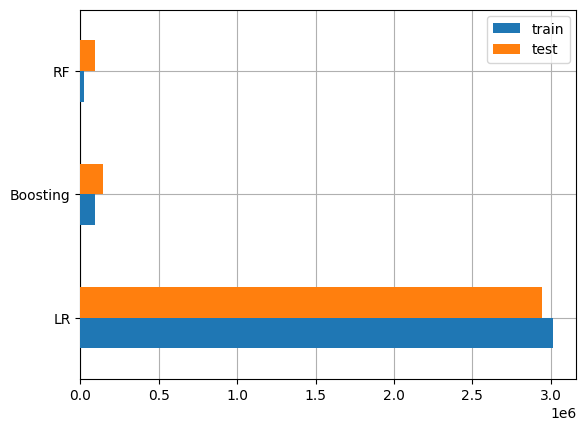

In [50]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

### **Insight dari Hasil Perbandingan**
1. **Linear Regression (LR) memiliki nilai MSE yang sangat besar** dibandingkan model lainnya, baik pada data training maupun testing.  
   - Hal ini menunjukkan bahwa model **kurang mampu menangkap pola hubungan** dalam data dengan baik, sehingga menghasilkan error yang sangat tinggi.
   - Kemungkinan besar, model ini **underfitting**, yaitu terlalu sederhana untuk dataset yang digunakan.

2. **Random Forest (RF) memiliki performa terbaik berdasarkan nilai MSE yang paling rendah**, terutama pada data training.  
   - Dengan nilai **MSE train = 20,567.55** dan **MSE test = 91,174.55**, model ini menunjukkan bahwa ia mampu mempelajari pola dalam data dengan baik.
   - Namun, terdapat **gap antara nilai MSE train dan test**, yang mungkin mengindikasikan model sedikit **overfitting** terhadap data training.

3. **XGBoost (Boosting) memiliki nilai MSE yang lebih tinggi dibanding Random Forest, tetapi masih jauh lebih baik dibanding Linear Regression**.  
   - Nilai **MSE train = 94,251.84** dan **MSE test = 143,101.78** menunjukkan bahwa model ini masih cukup baik dalam memprediksi data, meskipun tidak sebaik Random Forest.
   - Kemungkinan model ini masih bisa ditingkatkan performanya dengan **optimasi hyperparameter**.


### Prediksi Menggunakan Model pada Data Uji (Test Data) untuk Evaluasi

## Membuat Prediksi untuk 1 Sampel Data dan Membandingkan Hasilnya

Pada tahap ini, kita mengambil 1 sampel dari data testing (setelah PCA) dan melakukan prediksi menggunakan ketiga model yang telah dilatih (Linear Regression, Random Forest, dan XGBoost).  
Hasil prediksi tersebut kemudian dibandingkan dengan nilai target sebenarnya (y_true).

- **Proses**:
  - Menyalin satu data dari `X_test_pca` untuk dijadikan sampel prediksi.
  - Membuat dictionary `pred_dict` untuk menyimpan nilai aktual (`y_true`) dan hasil prediksi dari setiap model.
  - Melakukan prediksi pada sampel menggunakan semua model dalam `model_dict`, hasil prediksi dibulatkan hingga 1 angka desimal.
  - Menampilkan hasil prediksi dalam bentuk DataFrame.

- **Hasil**:
  - Didapatkan tabel yang memperlihatkan nilai target asli dan hasil prediksi dari masing-masing model, yang dapat digunakan untuk membandingkan akurasi prediksi secara individual.



In [51]:
prediksi = X_test_pca[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_LR,prediksi_RF,prediksi_Boosting
25564,69220,68915.5,71228.0,76691.296875


### Insight dan Kesimpulan Berdasarkan Prediksi Model

Berdasarkan hasil prediksi yang diberikan untuk data **y_true**, **prediksi_LR**, **prediksi_RF**, dan **prediksi_Boosting**, berikut adalah insight yang dapat diambil:

#### 1. **Prediksi Linear Regression (LR)**
   - **Prediksi LR**: 68,915.5  
     Prediksi model Linear Regression sangat dekat dengan nilai asli (`y_true = 69,220`), dengan selisih hanya sekitar **304.5**. Ini menunjukkan bahwa model Linear Regression memberikan prediksi yang sangat akurat untuk data ini.

#### 2. **Prediksi Random Forest (RF)**
   - **Prediksi RF**: 71,228.0  
     Prediksi model Random Forest sedikit lebih tinggi daripada nilai asli, dengan selisih sekitar **3,008**. Meskipun cukup dekat, perbedaan ini lebih besar dibandingkan dengan model Linear Regression.

#### 3. **Prediksi XGBoost (Boosting)**
   - **Prediksi Boosting**: 76,691.3  
     Prediksi model XGBoost lebih jauh dari nilai asli, dengan selisih sekitar **7,471.3**. Ini menunjukkan bahwa model Boosting cenderung menghasilkan prediksi yang lebih jauh dari nilai yang sebenarnya.

---

### Kesimpulan

- **Model Linear Regression (LR)** memberikan hasil prediksi yang paling mendekati nilai sebenarnya (y_true = 69,220), dengan kesalahan terkecil dibandingkan model lainnya. Ini menunjukkan bahwa untuk data ini, **Linear Regression** lebih akurat dalam memprediksi target dibandingkan dengan model Random Forest (RF) dan XGBoost (Boosting).
  
- **Model Random Forest (RF)** memberikan hasil yang lebih jauh dari nilai asli, namun masih dalam rentang yang wajar. Prediksi ini sedikit lebih besar dibandingkan dengan model Linear Regression.

- **Model Boosting (XGBoost)** memberikan prediksi yang cukup jauh dari nilai asli, yang menunjukkan bahwa meskipun XGBoost dapat sangat efektif dalam banyak kasus, untuk dataset ini ia tidak lebih baik daripada model Linear Regression.

### Rekomendasi

- **Linear Regression (LR)** adalah pilihan terbaik untuk data ini karena memberikan hasil yang lebih akurat dengan selisih yang lebih kecil. Meskipun model ini relatif sederhana, hasilnya sangat baik untuk kasus ini.
